# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Naufal Rafid Muhammad Faddila
- **Email:** naufal.rafid.mf@gmail.com
- **ID Dicoding:** naufalrafid

## Menentukan Pertanyaan Bisnis

- 1. Bagaimana Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda?
- 2. Bagaimana Tren Peminjaman Sepeda Berdasarkan Hari Dalam Seminggu dan Jam Dalam Sehari?

## Import Semua Packages/Library yang Digunakan

In [16]:
# Library
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

## Data Wrangling

### Gathering Data

In [3]:
df_day = pd.read_csv("Bike-sharing-dataset/day.csv")
df_hour = pd.read_csv("Bike-sharing-dataset/hour.csv")

In [4]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Missing value

In [6]:
print('Dataframe day:')
print(df_day.isna().sum())

print('\nDataframe hour:')
print(df_hour.isna().sum())

Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dari hasil pemeriksaan pada dataset df_day dan df_hour, tidak ada nilai yang hilang atau kosong.

Duplicate Data

In [7]:
print('Dataframe day:', df_day.duplicated().sum())
print('Dataframe hour:', df_hour.duplicated().sum())

Dataframe day: 0
Dataframe hour: 0


Tidak ada data yang duplicated

Descriptive statistics

In [8]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Descriptive Analysis**

1. Dataset day
    - Jumlah data: 731 entri.
    - Musim paling umum: Musim panas (season 2).
    - Tahun yang dominan: 2012 (yr = 1).
    - Bulan yang paling sering muncul: Juli (mnth 7).
    - Hari libur hanya ada sekitar 2.87% dari total hari.
    - Hari kerja adalah mayoritas (sekitar 68.40%).
    - Cuaca rata-rata pada keadaan yang baik (weathersit 1).
    - Suhu rata-rata adalah sekitar 0.50 (41°C), dengan suhu perasaan rata-rata sekitar 0.47 (50°C).
    - Kelembaban rata-rata sekitar 0.47 (47%).
    - Kecepatan angin rata-rata adalah sekitar 0.63 (67% dari maksimal).
    - Jumlah pengguna casual rata-rata sekitar 848.
    - Jumlah pengguna terdaftar rata-rata sekitar 3656.
    - Total rental rata-rata sekitar 4504 per hari.


2. Dataset hour
    - Dataset terdiri dari 17,379 entri.
    - Rata-rata kolom-kolom utama adalah sekitar:
        - Musim (season) 2.50, menunjukkan musim rata-rata.
        - Tahun (yr) 0.50, mengindikasikan perbandingan antara tahun 2011 dan 2012.
        - Bulan (mnth) 6.54, menunjukkan bulan rata-rata dalam setahun.
        - Jam (hr) 11.55, mengindikasikan jam rata-rata dalam sehari.
        - Hari libur (holiday) 0.03, persentase hari libur.
        - Hari dalam seminggu (weekday) 3.00, hari rata-rata dalam seminggu.
        - Hari kerja (workingday) 0.68, persentase hari kerja.
        - Kondisi cuaca (weathersit) 1.43, kondisi cuaca rata-rata.
        - Suhu (temp) 0.50, suhu rata-rata yang normal.
        - Suhu perasaan (atemp) 0.48, suhu perasaan mendekati suhu sebenarnya.
        - Kelembaban (hum) 0.48, kelembaban rata-rata.
        - Kecepatan angin (windspeed) 0.63, kecepatan angin rata-rata.
        - Pengguna casual (casual) 35.68, rata-rata jumlah pengguna casual.
        - Pengguna terdaftar (registered) 153.79, rata-rata jumlah pengguna terdaftar.
        - Total rental sepeda (cnt) 189.46, rata-rata jumlah total rental sepeda.

### Cleaning Data

Fixed data type

In [10]:
# df_day
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
# df_hour
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [11]:
# Check data type for df_day and df_hour
print('df_day["dteday"] : ', df_day["dteday"].dtypes)
print('df_hour["dteday"] : ', df_hour["dteday"].dtypes)

df_day["dteday"] :  datetime64[ns]
df_hour["dteday"] :  datetime64[ns]


## Exploratory Data Analysis (EDA)

Dataframe df_day

In [12]:
print("Informasi Dataframe df_day:")
print(df_day.info())
print("\nDeskripsi Statistik Dataframe df_day:")
print(df_day.describe())

Informasi Dataframe df_day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dty

Dataframe df_hour

In [13]:
print("\nInformasi Dataframe df_hour:")
print(df_hour.info())
print("\nDeskripsi Statistik Dataframe df_hour:")
print(df_hour.describe())


Informasi Dataframe df_hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64       

Distribusi data df_day

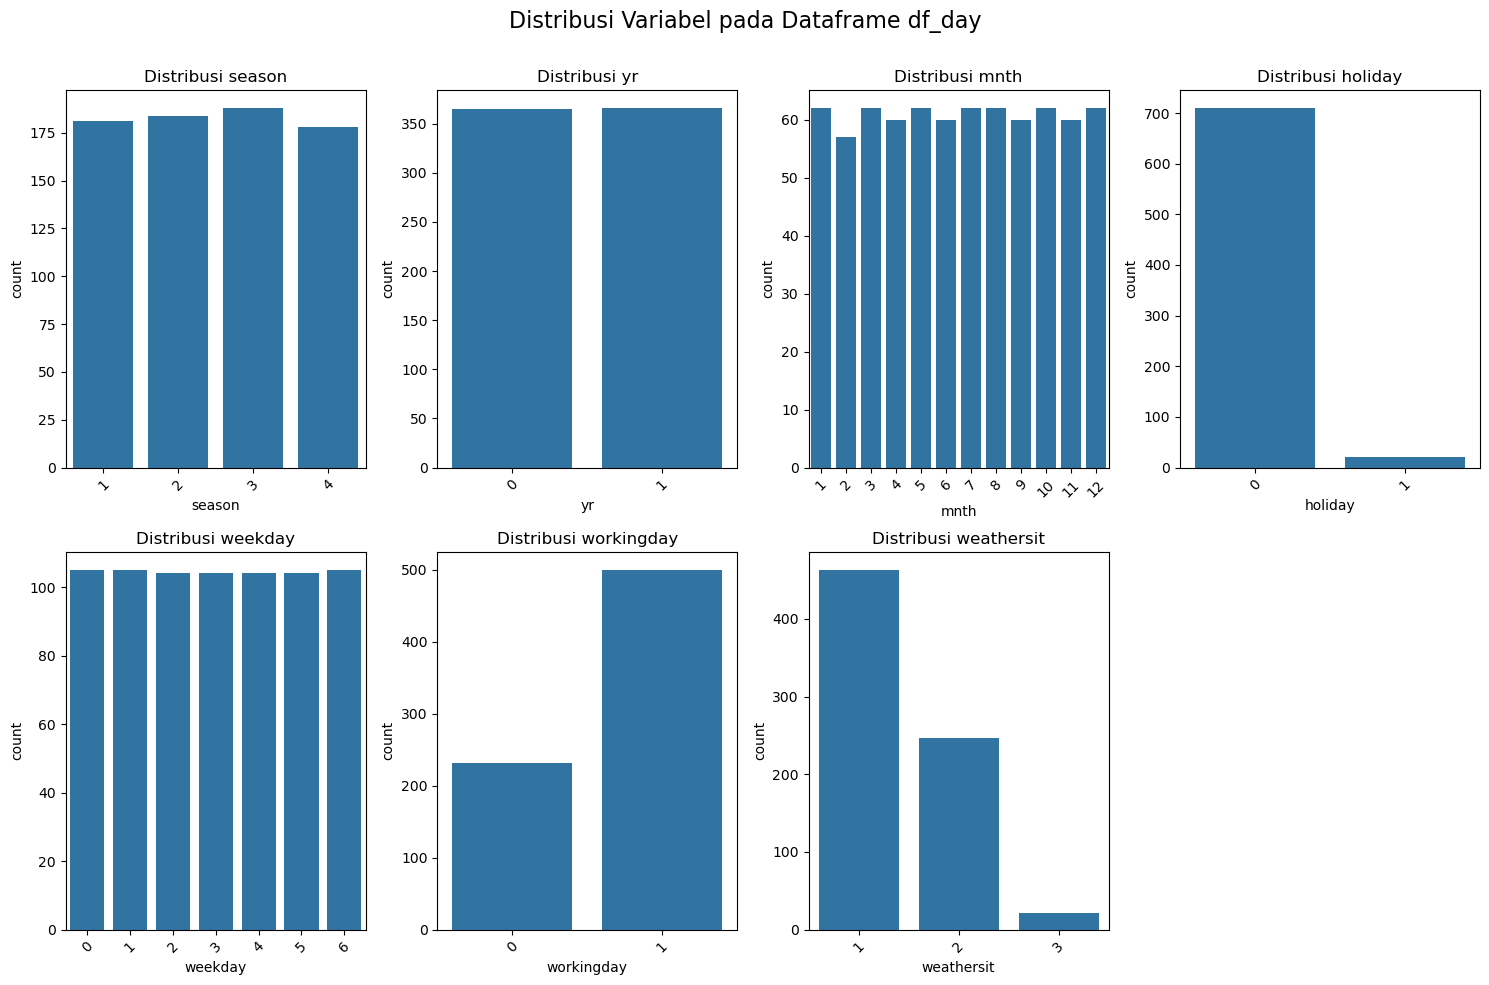

In [17]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribusi Variabel pada Dataframe df_day', fontsize=16)

for i, column in enumerate(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']):
    plt.subplot(2, 4, i+1)
    sns.countplot(data=df_day, x=column)
    plt.title(f'Distribusi {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Distribusi data df_hour

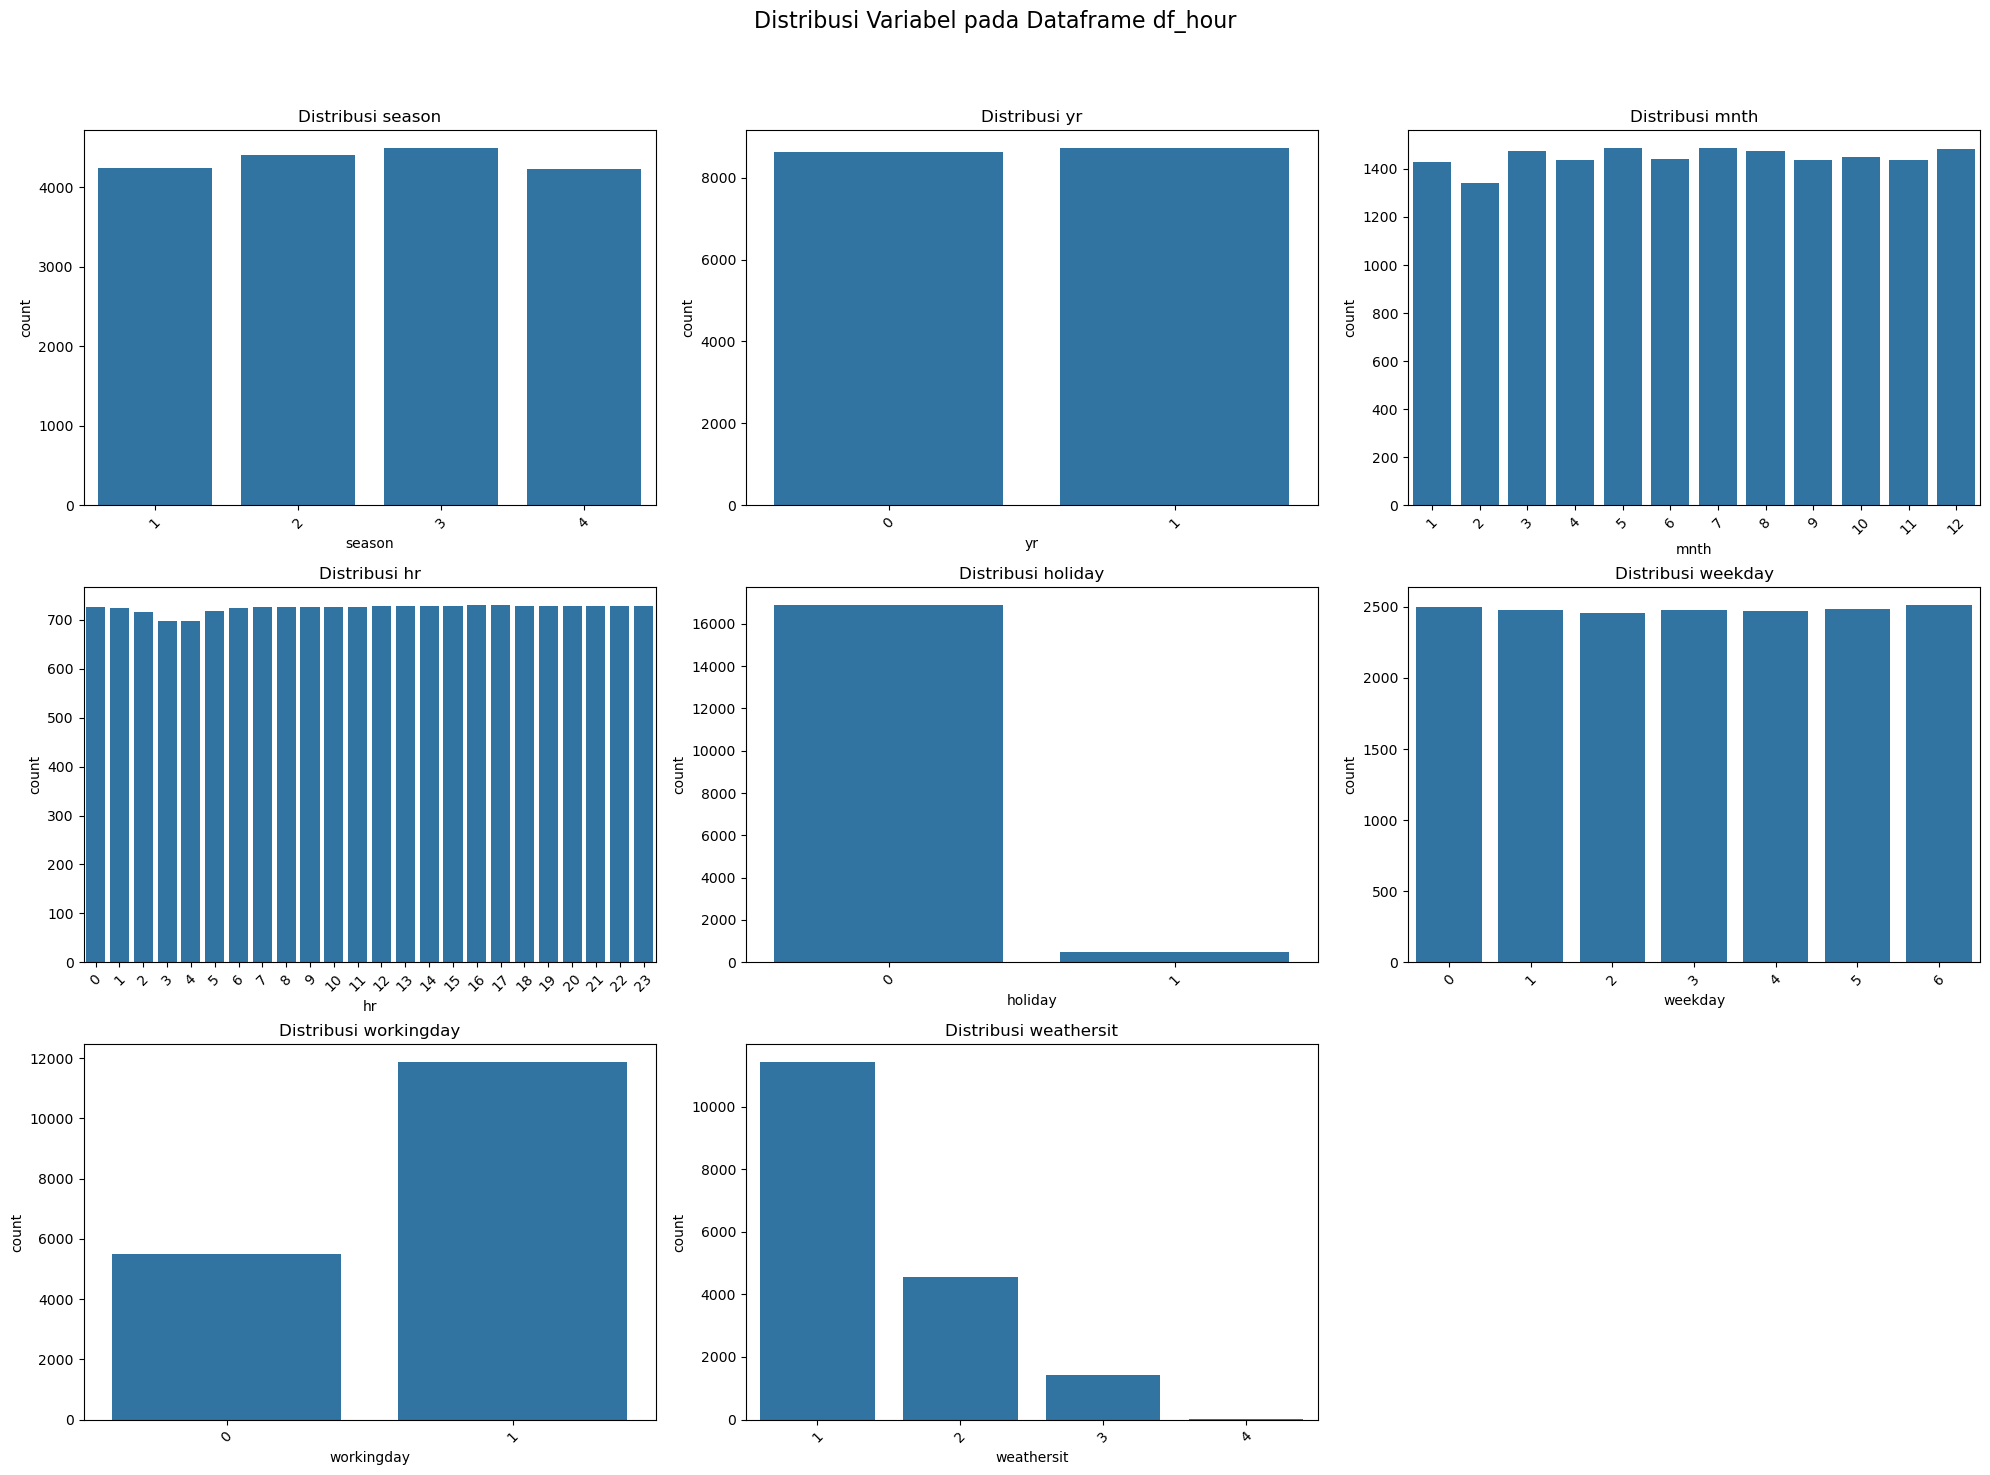

In [18]:
plt.figure(figsize=(20, 15))
plt.suptitle('Distribusi Variabel pada Dataframe df_hour', fontsize=16)

for i, column in enumerate(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df_hour, x=column)
    plt.title(f'Distribusi {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


Korelasi antar variabel di df_day

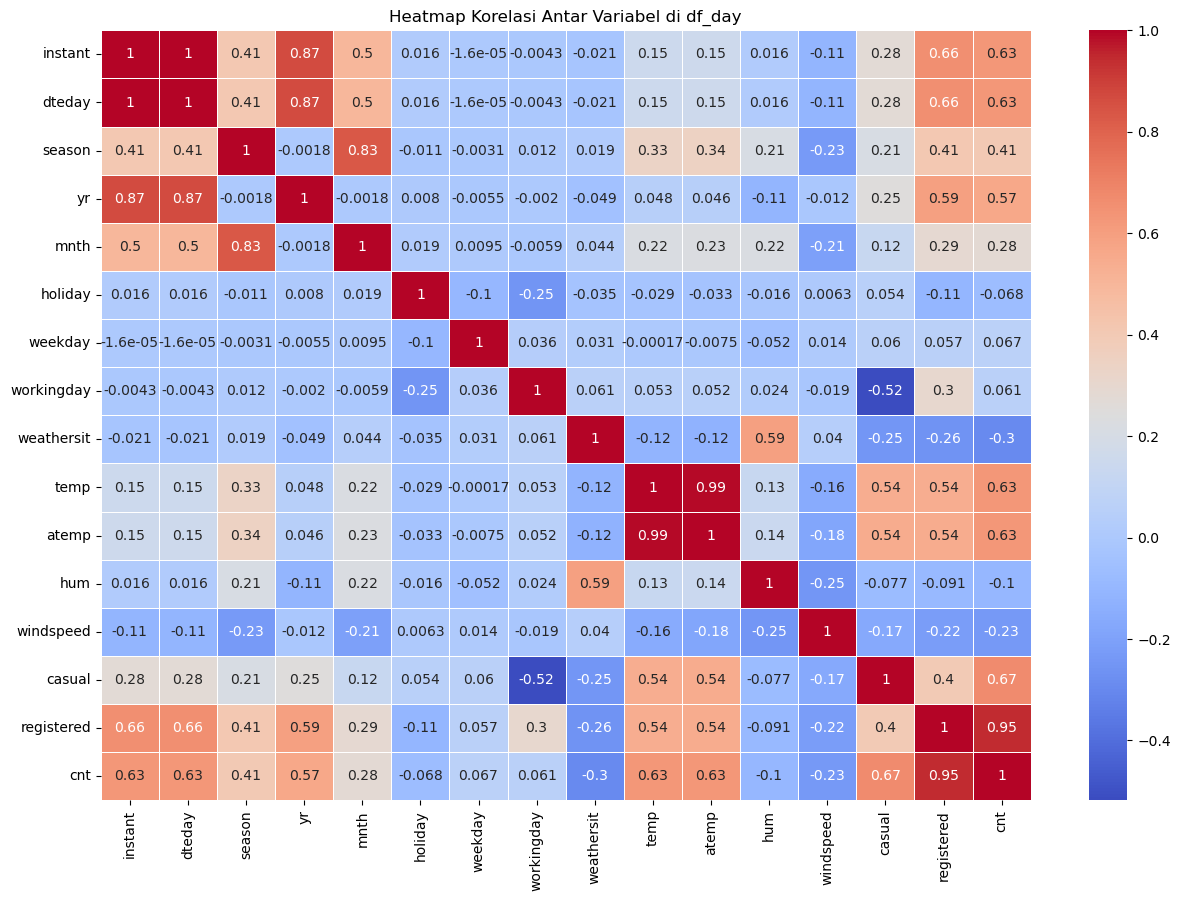

In [19]:
corr_day = df_day.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_day, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel di df_day')
plt.show()

Korelasi antar variabel di df_hour

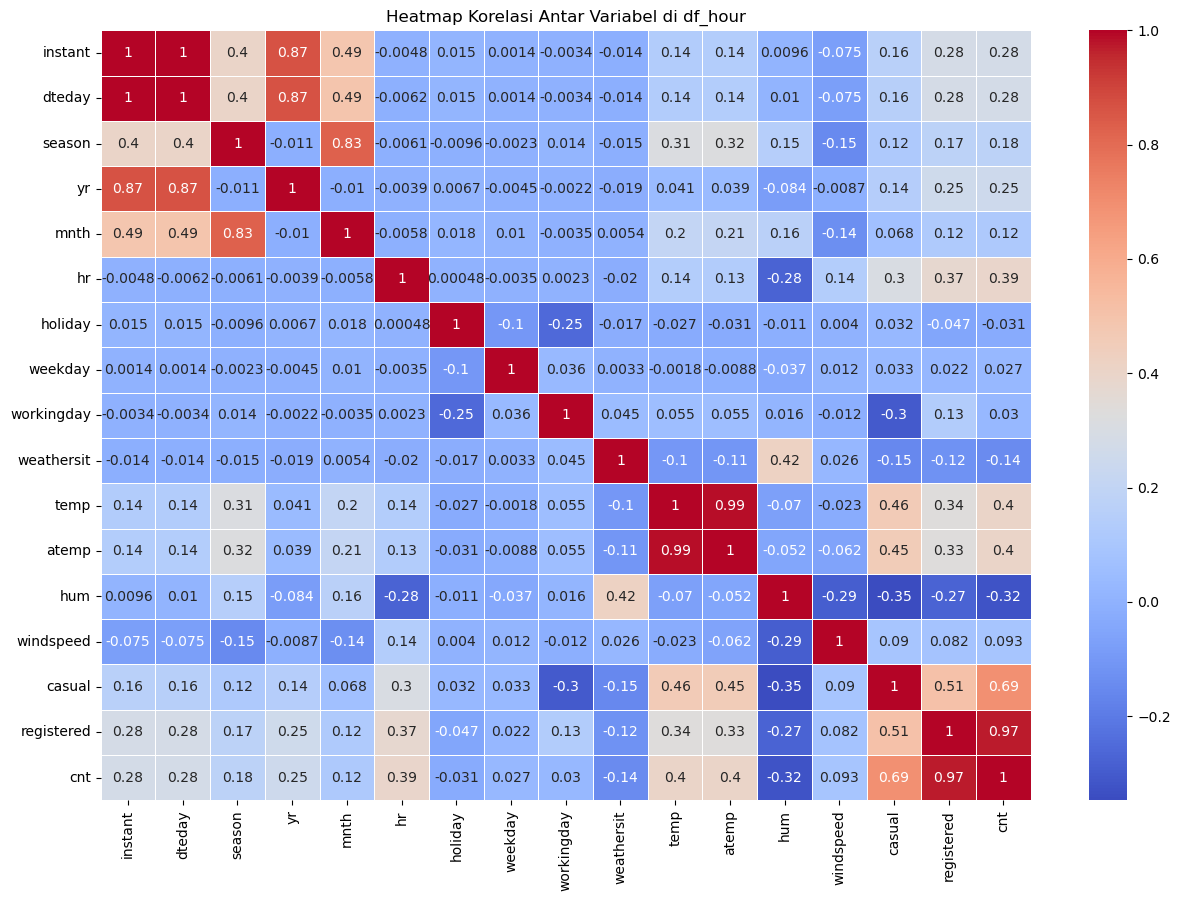

In [20]:
corr_hour = df_hour.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_hour, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel di df_hour')
plt.show()

Analisis hubungan antara suhu (temp) dan jumlah peminjaman sepeda (cnt) di df_day

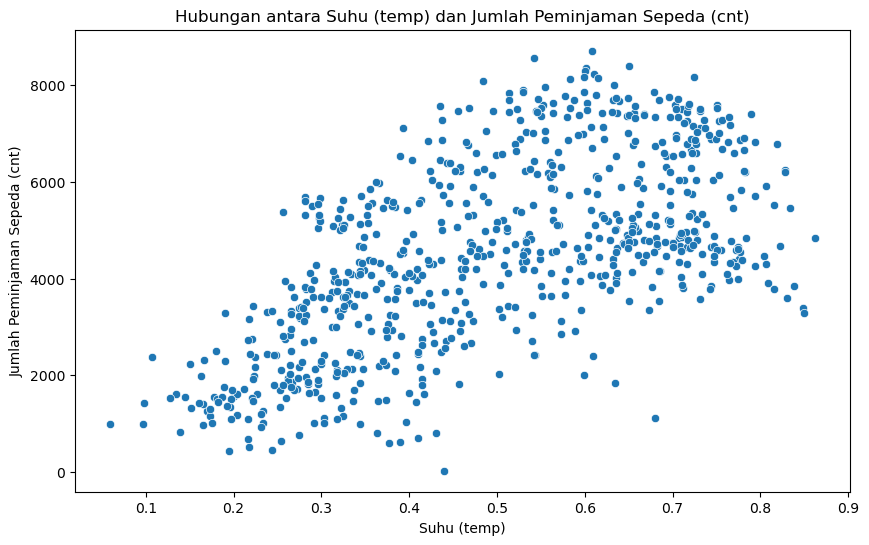

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_day, x='temp', y='cnt')
plt.title('Hubungan antara Suhu (temp) dan Jumlah Peminjaman Sepeda (cnt)')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.show()

Analisis hubungan antara suhu (temp) dan jumlah peminjaman sepeda (cnt) di df_hour

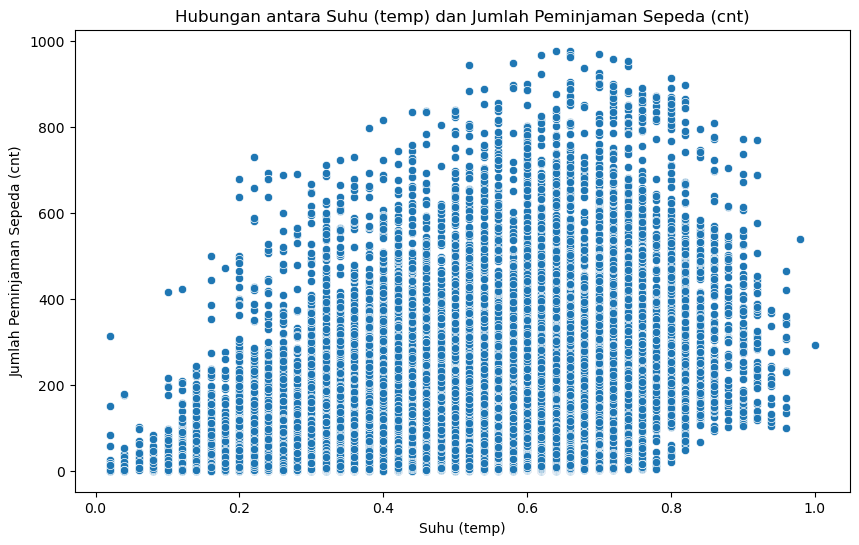

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hour, x='temp', y='cnt')
plt.title('Hubungan antara Suhu (temp) dan Jumlah Peminjaman Sepeda (cnt)')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.show()

Analisis hubungan antara kelembaban (hum) dan jumlah peminjaman sepeda (cnt) di df_day

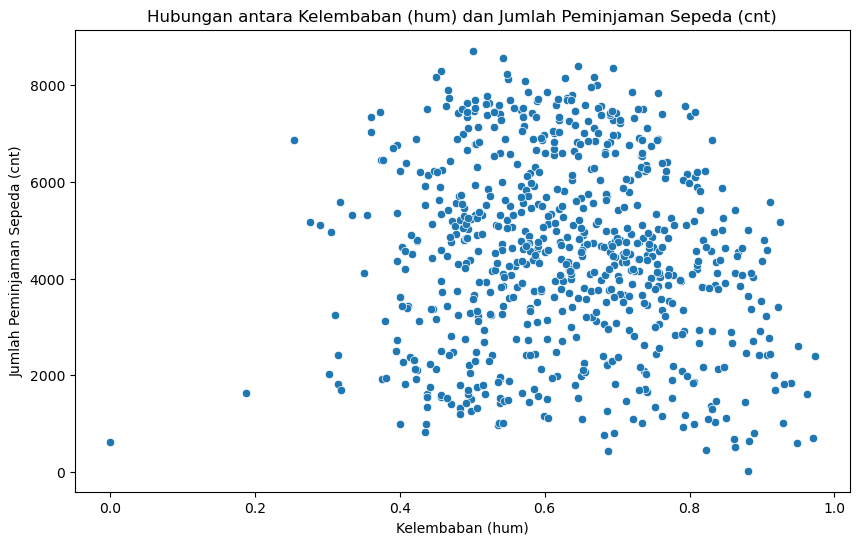

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_day, x='hum', y='cnt')
plt.title('Hubungan antara Kelembaban (hum) dan Jumlah Peminjaman Sepeda (cnt)')
plt.xlabel('Kelembaban (hum)')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.show()

Analisis hubungan antara kelembaban (hum) dan jumlah peminjaman sepeda (cnt) di df_hour

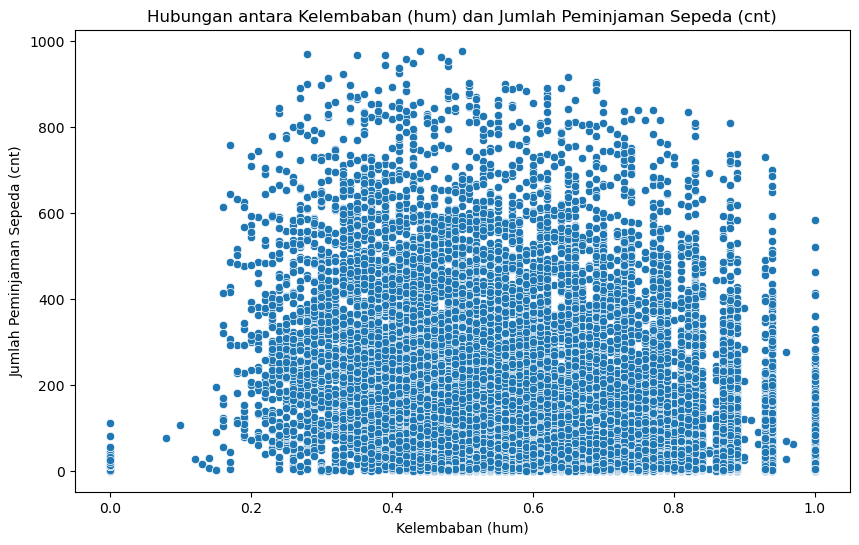

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hour, x='hum', y='cnt')
plt.title('Hubungan antara Kelembaban (hum) dan Jumlah Peminjaman Sepeda (cnt)')
plt.xlabel('Kelembaban (hum)')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda?

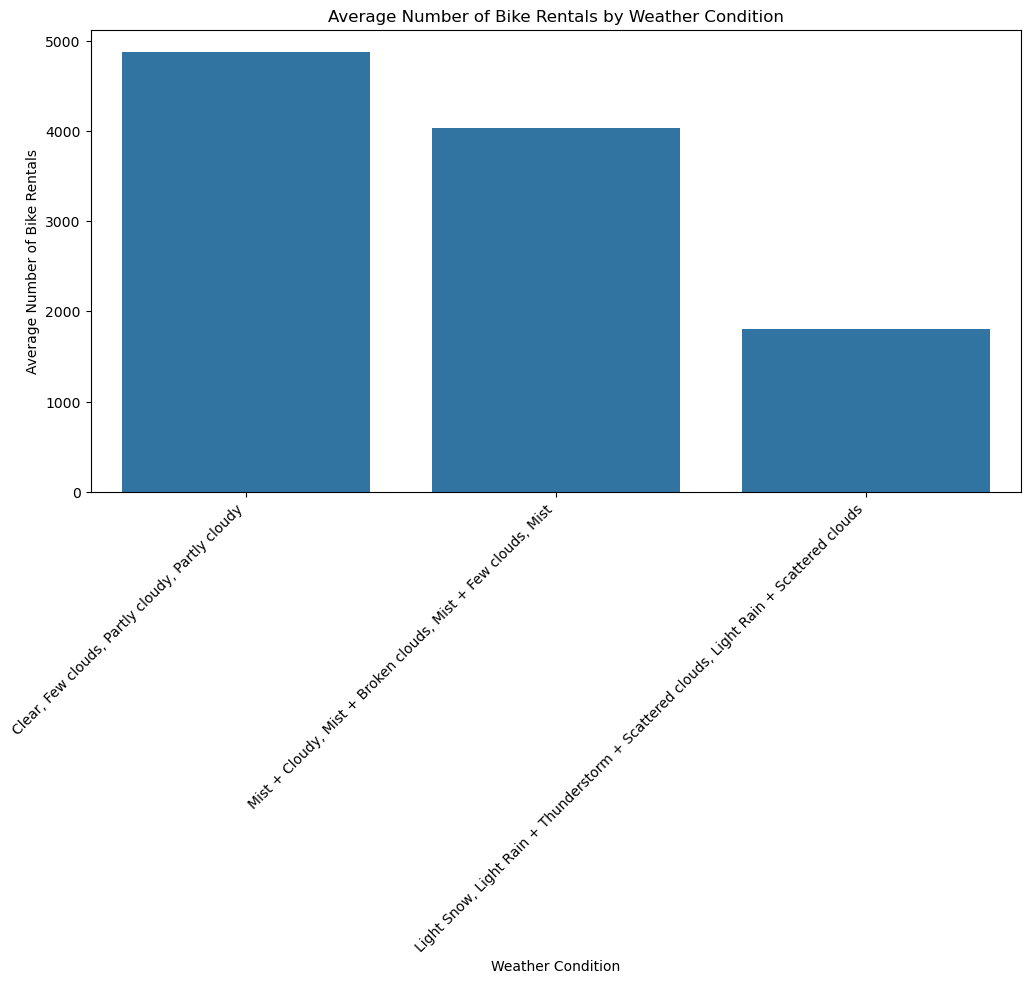

In [26]:
# Analyze the effect of weather on bike rentals
weather_counts = df_day.groupby('weathersit')['cnt'].mean().reset_index()
weather_counts.columns = ['Weather Situation', 'Average Count']

# Map the weather situation codes to descriptions
weather_conditions = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}
weather_counts['Weather Situation'] = weather_counts['Weather Situation'].map(weather_conditions)

# Plot the average count of bike rentals for each weather situation
plt.figure(figsize=(12, 6))
sns.barplot(x='Weather Situation', y='Average Count', data=weather_counts)
plt.title('Average Number of Bike Rentals by Weather Condition')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Number of Bike Rentals')
plt.xlabel('Weather Condition')
plt.show()

### Pertanyaan 2: Bagaimana Tren Peminjaman Sepeda Berdasarkan Hari Dalam Seminggu dan Jam Dalam Sehari?

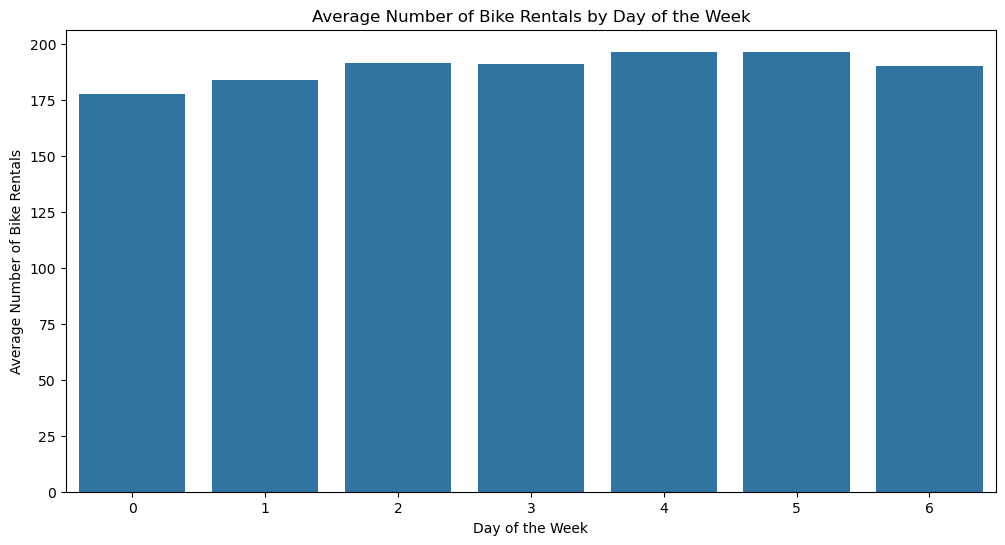

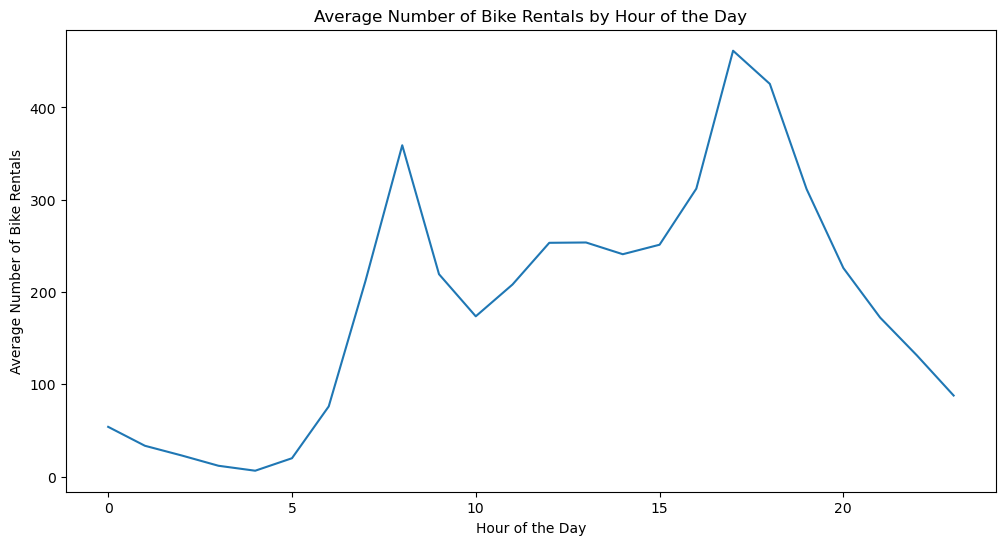

In [27]:
# Analyze the trend of bike rentals by day of the week
weekday_counts = df_hour.groupby('weekday')['cnt'].mean().reset_index()
weekday_counts.columns = ['Weekday', 'Average Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Weekday', y='Average Count', data=weekday_counts)
plt.title('Average Number of Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Bike Rentals')
plt.show()

# Analyze the trend of bike rentals by hour of the day
hour_counts = df_hour.groupby('hr')['cnt'].mean().reset_index()
hour_counts.columns = ['Hour', 'Average Count']

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Average Count', data=hour_counts)
plt.title('Average Number of Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Bike Rentals')
plt.show()


## Conclusion

## Kesimpulan
Dari analisis di atas, dapat disimpulkan bahwa:
1. Kondisi cuaca sangat mempengaruhi jumlah peminjaman sepeda. Cuaca yang cerah dan sedikit berawan cenderung meningkatkan jumlah peminjaman, sedangkan cuaca yang buruk seperti hujan deras atau kabut menurunkan jumlah peminjaman.
2. Tren peminjaman sepeda menunjukkan pola tertentu sepanjang minggu dan juga bervariasi sepanjang hari. Misalnya, peminjaman cenderung lebih tinggi pada akhir pekan dan pada jam-jam tertentu dalam sehari seperti jam sibuk pagi dan sore.
